# Case técnico Jeitto

Este notebook contem análises de uma base de dados sobre clientes e suas compras. Para guia este estudo iremos levantar as seguintes questões a respeito dos clientes:
- Na primeira compra os clientes tendem a comprar qual produto?
- Qual a distribuição dos clientes por estado?
- Qual a distribuição dos clientes por faixas etárias?
- Qual o ticket medio dos clientes?
- Qual o produto mais vendido por regiao do país (sul, sudeste, norte, nordeste, centro-oeste) ?
- Quantos clientes fantasmas (nunca compraram nada) existem na base?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

In [2]:
dfRaw = pd.read_csv("base_clientes.csv", sep=";")

In [3]:
dfRaw.head()

,id_cliente,age,state,first_purchased_product,product_b_total_qty,product_c_total_qty,product_a_total_qty,product_b_total_value,product_c_total_value,product_a_total_value
0,1547896,55,MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1547897,28,AL,a,NaN,NaN,9.0,NaN,NaN,144
2,1547898,45,SE,a,8.0,3.0,1.0,203.0,"333,18",20
3,1547899,47,PE,a,4.0,NaN,5.0,136.0,NaN,7
4,1547900,32,SP,b,9.0,12.0,NaN,8.0,0,NaN


## Análise dos dados

Olhando para as 5 primeiras linhas da base podemos ver que os campos vazios foram interpretados como NaN. Vamos analisar quantos NaN existe em cada coluna da base.

In [4]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 10 columns):
id_cliente                 9974 non-null int64
age                        9974 non-null int64
state                      9962 non-null object
first_purchased_product    6001 non-null object
product_b_total_qty        4863 non-null float64
product_c_total_qty        3107 non-null float64
product_a_total_qty        1457 non-null float64
product_b_total_value      4863 non-null float64
product_c_total_value      3107 non-null object
product_a_total_value      1457 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 779.3+ KB


É interessante observar que existem 3973 clientes (de uma base de 9974 clientes, o que representa quase **40%** da base) que não temos dados sobre a primeira compra. Vamos investigar quem são esses clientes. 

In [5]:
ghostCustomer = dfRaw[pd.isna(dfRaw["first_purchased_product"]) == True]
ghostCustomer.head()

,id_cliente,age,state,first_purchased_product,product_b_total_qty,product_c_total_qty,product_a_total_qty,product_b_total_value,product_c_total_value,product_a_total_value
0,1547896,55,MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1547902,28,PE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1547904,26,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1547911,47,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1547912,42,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ghostCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3973 entries, 0 to 9973
Data columns (total 10 columns):
id_cliente                 3973 non-null int64
age                        3973 non-null int64
state                      3961 non-null object
first_purchased_product    0 non-null object
product_b_total_qty        0 non-null float64
product_c_total_qty        0 non-null float64
product_a_total_qty        0 non-null float64
product_b_total_value      0 non-null float64
product_c_total_value      0 non-null object
product_a_total_value      0 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 341.4+ KB


A respeito dos clientes fantasmas, temos poucas informações. Para a grande maioria sabemos apenas a sua idade e estado de residência. Como estes clientes representam uma fatia considerável da base, vamos analisar essas duas características que temos sobre os mesmos.

## Faixa etária dos clientes

Vamos criar uma função que determine qual a faixa etária de cada cliente seguindo a divisão realizada pelo [IBGE](https://www.ibge.gov.br/apps/populacao/projecao/) .

In [7]:
minAge = ghostCustomer["age"].min()
maxAge = ghostCustomer["age"].max()

print("Cliente mais novo: " + str(minAge))
print("Cliente mais velho: " + str(maxAge))

Cliente mais novo: 0
Cliente mais velho: 58


Um problema que é possível de acontecer em bases de dados é a inconsistência dos dados. Podemos ver que o cliente mais novo possui idade 0. Como isso não faz sentindo para a empresa, vamos analisar a distribuição das idades através de um gráfico. 

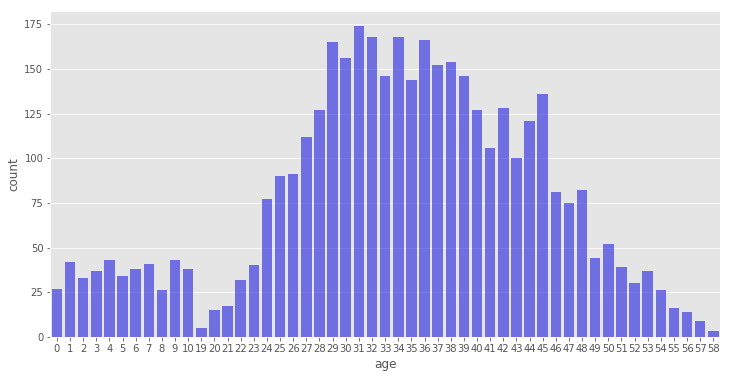

In [8]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="age", data=ghostCustomer,color='b', alpha=0.6)
# _ = sns.distplot(a=ghostCustomer['age'], hist=False, rug=True);

Como mencionado temos vários clientes com idade abaixo de 19 anos. Esses clientes iremos retirar da base pois iremos assumir que os dados estão inconsistentes.

In [9]:
ghostCustomerOfAge = ghostCustomer[ghostCustomer["age"] >= 19][["id_cliente", "age", "state"]]
ghostCustomerOfAge.head()

,id_cliente,age,state
0,1547896,55,MT
6,1547902,28,PE
8,1547904,26,MG
15,1547911,47,RJ
16,1547912,42,SP


Vamos analisar uma rápida descrição da coluna 'age' dos clientes fantasmas. 

In [10]:
ghostCustomerOfAge["age"].describe()

count    3571.000000
mean       36.439373
std         7.967223
min        19.000000
25%        30.000000
50%        36.000000
75%        42.000000
max        58.000000
Name: age, dtype: float64

In [11]:
variationCoeficient = (ghostCustomerOfAge["age"].std()/ghostCustomerOfAge["age"].mean())*100
print("Coeficiente de variação: {:.2f}%".format(variationCoeficient))

Coeficiente de variação: 21.86%


A idade média dos clientes é de 36 anos. O coeficiente de variação é de 21,86%, logo podemos considerar que a idade tem uma [variação média](https://mundoeducacao.bol.uol.com.br/matematica/coeficiente-variacao.htm). O 25° percentil é de 30 anos, ou seja, 25% dos clientes tem até 30 anos. E, analogamente, 75% dos clientes tem até 42 anos. 

Agora vamos segregar os clientes nas faixas etárias


In [12]:
def ageRange(age):
    minAge = 19
    maxAge = minAge + 5
    ageRangeClass = 1
    while True:
        if age >= minAge and age <= maxAge:
            return str(minAge) + "-" + str(maxAge)
        else:
            ageRangeClass += 1
            minAge = maxAge 
            maxAge = minAge + 5

ghostCustomerOfAge["age_range"] = ghostCustomerOfAge["age"].apply(ageRange)

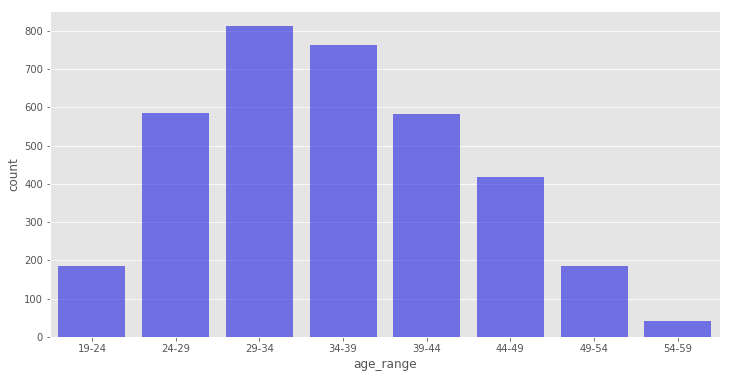

In [13]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="age_range", data=ghostCustomerOfAge, color='b', order=sorted(ghostCustomerOfAge["age_range"].unique()), alpha=0.6)

Como é possível observar no gráfico, boa parte dos clientes fantasmas tem entre 29 e 39 anos, sendo que os clientes de 29 a 34 anos são cerca de 800. 

## UF dos clientes fantasmas

Vamos analisar as UF dos clientes fantasmas. Primeiro, vamos plotar um gráfico com a contagem de cada uma.

<Figure size 1440x432 with 0 Axes>

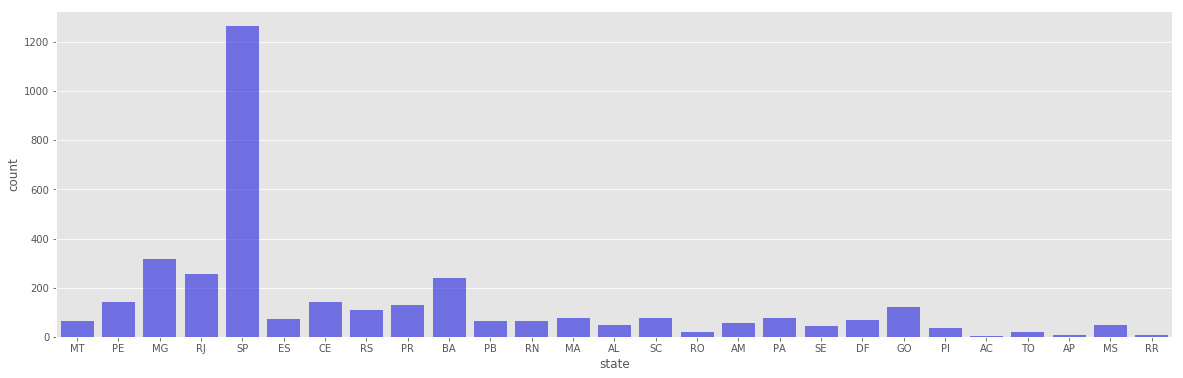

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(x="state", data=ghostCustomerOfAge, color='b',alpha=0.6)

Podemos ver que SP é o estado que possue mais clientes, seguido de MG, RJ e BA. Vamos ver quem são os 7 primeiros estados em números de clientes fantasmas

In [15]:
stateCount = ghostCustomerOfAge.groupby('state').count()
stateCount["id_cliente"].sort_values(ascending=False)[:7]

state
SP    1265
MG     317
RJ     255
BA     238
CE     141
PE     141
PR     128
Name: id_cliente, dtype: int64

Depois da BA, ainda temos CE, PE e PR dentre os 7 primeiros estados em números de clientes fantasmas. 

Agora vamos ver a distribuição dos clientes fantasmas por regiao do país. 

In [16]:
regions = dict()

regions["southeast"] = ["SP", "RJ", "MG", "ES"]
regions["south"] = ["RS", "SC", "PR"]
regions["nort"] = ["TO", "AC", "PA", "RO", "RR", "AP" "AM"]
regions["northeast"] = ["BA", "SE", "AL", "PB", "PE", "RN", "CE", "PI", "MA"]
regions["midwest"] = ["MT", "MS", "GO", "DF"]

In [17]:
def defineCountryRegion(state):
    for reg in regions.keys():
        if state in regions[reg]:
            return reg
    return np.nan

        

In [18]:
ghostCustomerOfAge["country_region"] = ghostCustomerOfAge["state"].apply(defineCountryRegion)

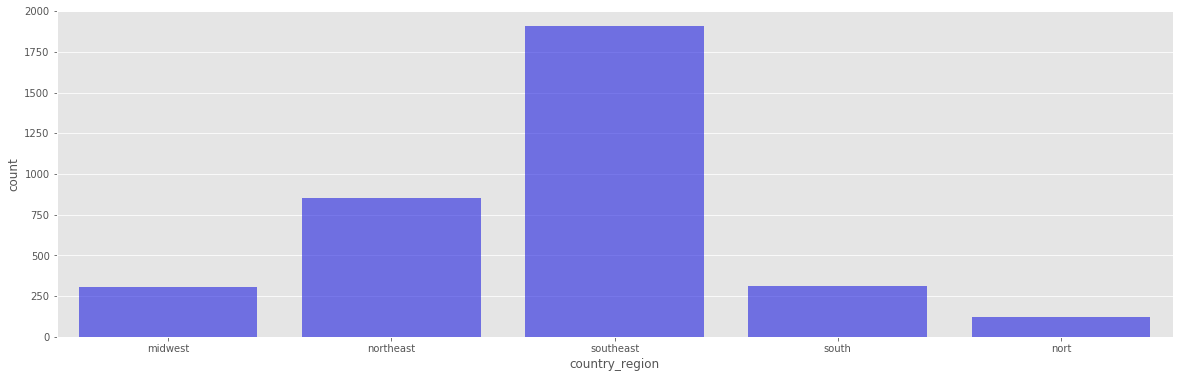

In [19]:
_ = plt.figure(figsize=(20, 6))
_ = sns.countplot(x="country_region", data=ghostCustomerOfAge, color='b',alpha=0.6)

A região com mais clientes é a sudeste, logo em seguida do nordeste. Agora vamos analisar como as duas faixas etárias mais recorrentes se distribuem nas regiões do país. Isso poderá nos gerar insights sobre alguma ação a ser tomada a fim de engajar estes clientes fantasmas. 

In [20]:
# Iremos montar uma lista com os indices dos clientes das faixas etárias mais frequentes
topTwoAgeRangeIndex = ghostCustomerOfAge.loc[(ghostCustomerOfAge["age_range"] == '29-34') | (ghostCustomerOfAge["age_range"] == '34-35'), ].index

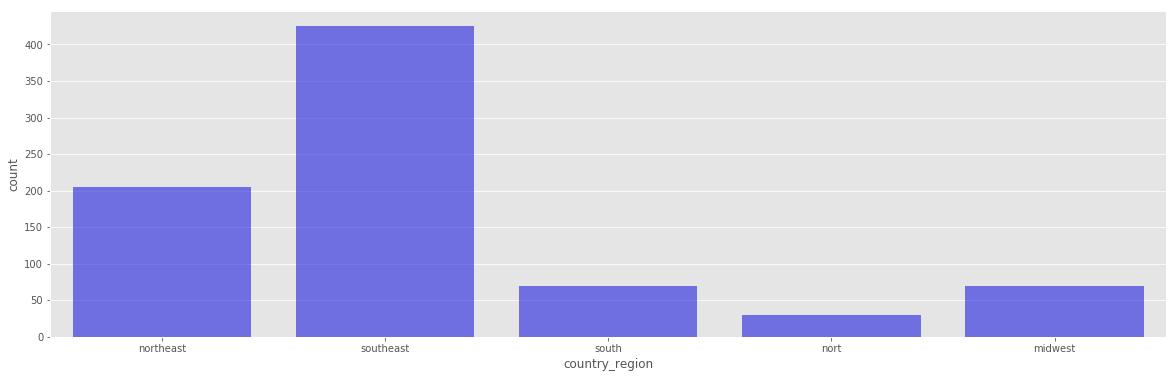

In [21]:
_ = plt.figure(figsize=(20, 6))
_ = sns.countplot(x="country_region", data=ghostCustomerOfAge.loc[topTwoAgeRangeIndex], color='b',alpha=0.6)


Seguindo a distribuição principal, os clientes fantasmas entre as idades de 29 a 35 anos estão mais presentes no Sudeste e Nordeste. Sendo assim, alguma campanha de marketing pode ser realizada focando estes públicos, incentivando-os a realizarem a primeira compra na empresa. 

---

## Clientes ativos

Agora vamos olhar para os clientes que realizaram ao menos uma compra. Vamos realizar a mesma análise feita para os clientes fantasmas. 

In [22]:
activeCustomer = dfRaw[pd.isna(dfRaw["first_purchased_product"]) != True]
activeCustomer.head()

,id_cliente,age,state,first_purchased_product,product_b_total_qty,product_c_total_qty,product_a_total_qty,product_b_total_value,product_c_total_value,product_a_total_value
1,1547897,28,AL,a,NaN,NaN,9.0,NaN,NaN,144
2,1547898,45,SE,a,8.0,3.0,1.0,203.0,"333,18",20
3,1547899,47,PE,a,4.0,NaN,5.0,136.0,NaN,7
4,1547900,32,SP,b,9.0,12.0,NaN,8.0,0,NaN
5,1547901,42,MG,b,19.0,NaN,NaN,24.0,NaN,NaN


In [23]:
activeCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6001 entries, 1 to 9972
Data columns (total 10 columns):
id_cliente                 6001 non-null int64
age                        6001 non-null int64
state                      6001 non-null object
first_purchased_product    6001 non-null object
product_b_total_qty        4863 non-null float64
product_c_total_qty        3107 non-null float64
product_a_total_qty        1457 non-null float64
product_b_total_value      4863 non-null float64
product_c_total_value      3107 non-null object
product_a_total_value      1457 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 515.7+ KB


## Faixa etária dos clientes ativos

Vamos aproveitar a funcao ageRange() para aplicar aos dados dos clientes ativos e determinar a faixa etária de cada um deles

In [24]:
minAge = activeCustomer["age"].min()
maxAge = activeCustomer["age"].max()

print("Cliente mais novo: " + str(minAge))
print("Cliente mais velho: " + str(maxAge))

Cliente mais novo: 0
Cliente mais velho: 59


Novamente o problema de inconsistência dos dados aconteceu aqui. Podemos ver que o cliente mais novo possui idade 0. Como isso não faz sentindo para a empresa, vamos analisar a distribuição das idades através de um gráfico. 

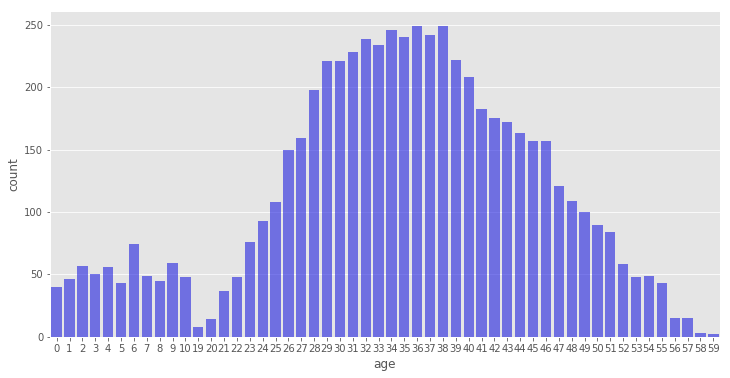

In [25]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="age", data=activeCustomer,color='b', alpha=0.6)
# _ = sns.distplot(a=ghostCustomer['age'], hist=False, rug=True);

In [26]:
activeCustomerOfAge = activeCustomer[activeCustomer["age"] >= 19]
activeCustomerOfAge.head()

,id_cliente,age,state,first_purchased_product,product_b_total_qty,product_c_total_qty,product_a_total_qty,product_b_total_value,product_c_total_value,product_a_total_value
1,1547897,28,AL,a,NaN,NaN,9.0,NaN,NaN,144
2,1547898,45,SE,a,8.0,3.0,1.0,203.0,"333,18",20
3,1547899,47,PE,a,4.0,NaN,5.0,136.0,NaN,7
4,1547900,32,SP,b,9.0,12.0,NaN,8.0,0,NaN
5,1547901,42,MG,b,19.0,NaN,NaN,24.0,NaN,NaN


Vamos analisar uma rápida descrição da coluna 'age' dos clientes ativos. 

In [27]:
activeCustomerOfAge["age"].describe()

count    5434.000000
mean       36.832904
std         8.084432
min        19.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        59.000000
Name: age, dtype: float64

In [28]:
variationCoeficient = (activeCustomerOfAge["age"].std()/activeCustomerOfAge["age"].mean())*100
print("Coeficiente de variação: {:.2f}%".format(variationCoeficient))

Coeficiente de variação: 21.95%


A idade média dos clientes é de 36 anos. O coeficiente de variação é de 21,95%, logo podemos considerar que a idade tem uma [variação média](https://mundoeducacao.bol.uol.com.br/matematica/coeficiente-variacao.htm). O 25° percentil é de 31 anos, ou seja, 25% dos clientes tem até 31 anos. E, analogamente, 75% dos clientes tem até 43 anos. 

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


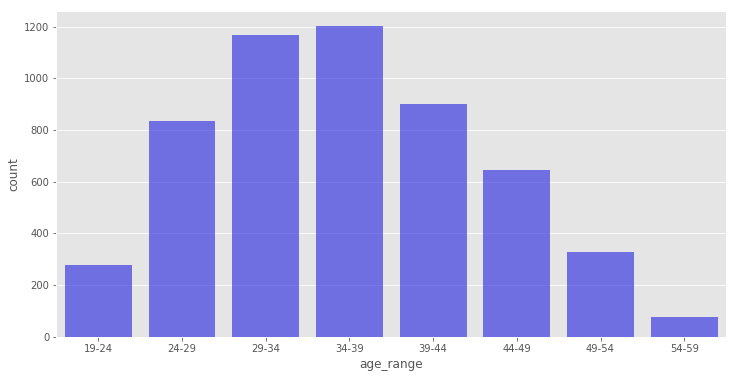

In [29]:
activeCustomerOfAge["age_range"] = activeCustomerOfAge["age"].apply(ageRange)
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="age_range", data=activeCustomerOfAge, color='b', order=sorted(activeCustomerOfAge["age_range"].unique()), alpha=0.6)

## UF dos clientes ativos

Vamos analisar as UF dos clientes ativos. Primeiro, vamos plotar um gráfico com a contagem de cada uma.

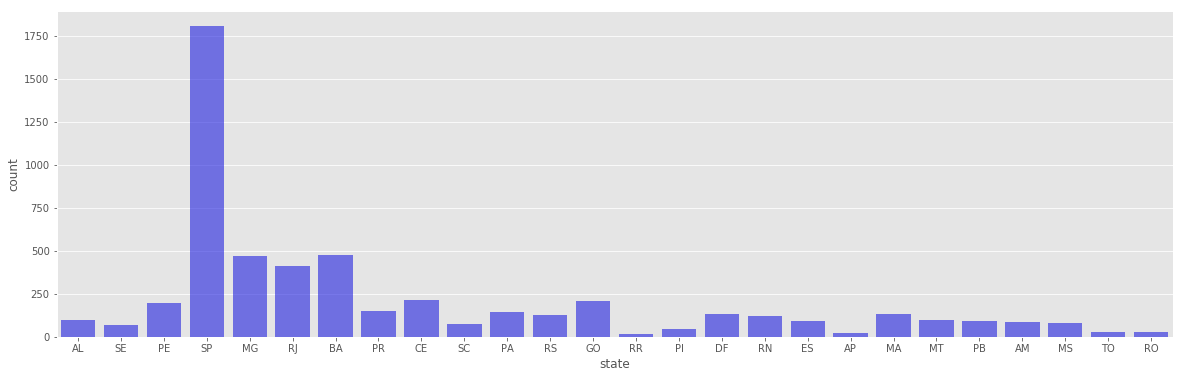

In [30]:
_ = plt.figure(figsize=(20, 6))
_ = sns.countplot(x="state", data=activeCustomerOfAge, color='b',alpha=0.6)

Novamente, SP é o estado que mais se destaca em números de clientes, seguido por BA e MG. Novamente, vamos ve quem são os 7 primeiros estados em números de clientes. 

In [31]:
stateCount = activeCustomerOfAge.groupby('state').count()
stateCount["id_cliente"].sort_values(ascending=False)[:7]

state
SP    1808
BA     479
MG     469
RJ     411
CE     217
GO     209
PE     197
Name: id_cliente, dtype: int64

Agora vamos ver a distribuição dos clientes fantasmas por regiao do país. 

In [32]:
activeCustomerOfAge["country_region"] = activeCustomerOfAge["state"].apply(defineCountryRegion)

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


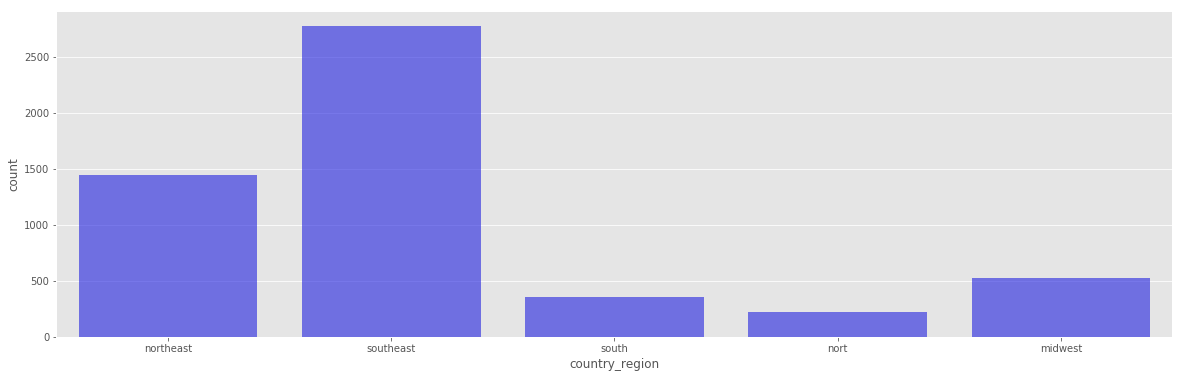

In [33]:
_ = plt.figure(figsize=(20, 6))
_ = sns.countplot(x="country_region", data=activeCustomerOfAge, color='b',alpha=0.6)

A região com mais clientes é a sudeste, logo em seguida do nordeste. Agora vamos analisar como as duas faixas etárias mais recorrentes se distribuem nas regiões do país. Isso poderá nos gerar insights sobre alguma ação a ser tomada para melhorar o relacionamento com os clientes. 

In [34]:
# Iremos montar uma lista com os indices dos clientes das faixas etárias mais frequentes
topTwoAgeRangeIndex = activeCustomerOfAge.loc[(activeCustomerOfAge["age_range"] == '29-34') | (activeCustomerOfAge["age_range"] == '34-35'), ].index

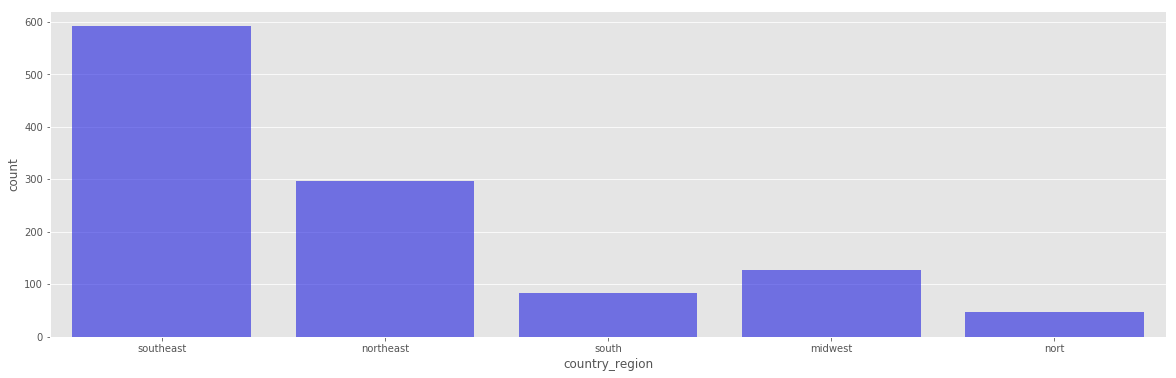

In [35]:
_ = plt.figure(figsize=(20, 6))
_ = sns.countplot(x="country_region", data=activeCustomerOfAge.loc[topTwoAgeRangeIndex], color='b',alpha=0.6)


Seguindo a distribuição principal, os clientes ativos entre as idades de 29 a 35 anos estão mais presentes no Sudeste e Nordeste. Sendo assim, alguma campanha de marketing pode ser realizada focando estes públicos. 

## Primeira compra

Vamos analisar como foram as primeiras compras dos clientes. Primeiro, vamos ver a frequencia de compra de cada produto. 

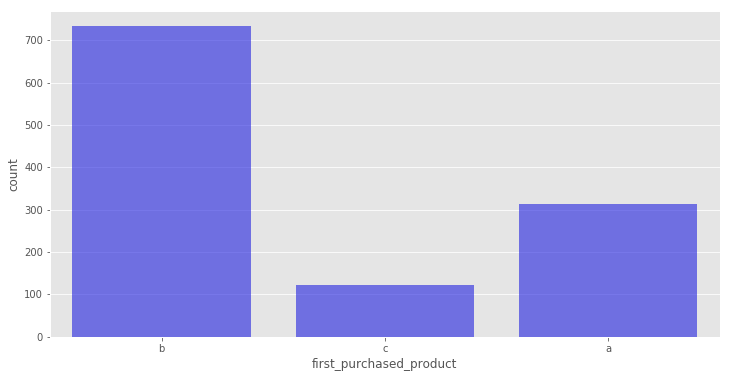

In [36]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="first_purchased_product", data=activeCustomerOfAge.loc[topTwoAgeRangeIndex], color='b',alpha=0.6)


Os clientes no geral tenderam a comprar o produto b em sua primeira compra na loja. Vamos analisar a primeira compra por faixa etária. 

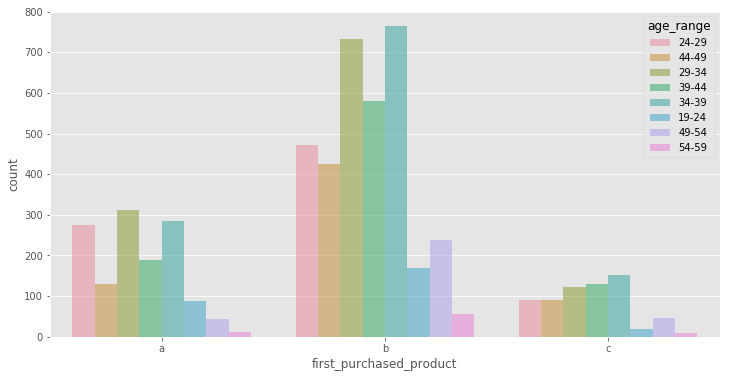

In [42]:
_ = plt.figure(figsize=(12, 6))
_ = sns.countplot(x="first_purchased_product", 
                  data=activeCustomerOfAge, 
                  hue="age_range", alpha=0.6)

Para o produto b, quem mais comprou na primeira compra foram pessoas entre 34 a 39 anos, que é a faixa etária mais frequente na base de dados. Vale observar também que pessoas de 54 a 58 anos também compraram o produto b de forma considerável (mais de 400 vezes). 